In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def three_dof_body_axes(Fx, Fz, My, u0, w0, theta0, q0, alpha0, pos0, mass, inertia, g, dt=0.01, duration=10):
    # ensure pos0 is a float array
    pos = np.array(pos0, dtype=float)
    
    # initial conditions
    u = u0
    w = w0
    theta = theta0
    q = q0
    alpha = alpha0
    vel = np.array([u, w])
    
    # initial acceleration
    ax = Fx[0] / mass
    az = Fz[0] / mass - g
    
    # history lists to store values
    theta_list = [theta]
    q_list = [q]
    dqdt_list = [0]
    pos_list = [pos.copy()]
    velocity_list = [vel.copy()]
    acceleration_list = [np.array([ax, az])]

    # time integration using Euler's method
    for t in np.arange(dt, duration + dt, dt):  # start at dt and end at 'duration'
        # calculate accelerations
        ax = Fx[int(t/dt)] / mass
        az = Fz[int(t/dt)] / mass - g
        
        # calculate angular acceleration
        dqdt = My[int(t/dt)] / inertia
        
        # update velocities
        u += ax * dt
        w += az * dt
        q += dqdt * dt
        
        # update positions
        pos += vel * dt
        vel = np.array([u, w])
        
        # update angle
        theta += q * dt
        
        # store data in list
        theta_list.append(theta)
        q_list.append(q)
        dqdt_list.append(dqdt)
        pos_list.append(pos.copy())
        velocity_list.append(vel.copy())
        acceleration_list.append(np.array([ax, az]))
        
        # stop if the rocket returns to ground level
        if pos[1] <= 0 and t > 2:  # allow some time for launch
            break
    
    return {
        'theta' : np.array(theta_list),
        'q' : np.array(q_list),
        'dqdt' : np.array(dqdt_list),
        'pos' : np.array(pos_list),
        'velocity' : np.array(velocity_list),
        'acceleration' : np.array(acceleration_list)
    }

In [40]:
def generate_thrust_profile(duration, thrust_duration, thrust_force, dt=0.01):
    thrust_profile = []
    for t in np.arange(0, duration + dt, dt):  # add dt to ensure full duration coverage
        if t < thrust_duration:
            thrust_profile.append(thrust_force)
        else:
            thrust_profile.append(0)
    return np.array(thrust_profile)

In [41]:
# parameters
mass = 0.543 # kg
inertia = 0.048 # kg*m^2
g = 9.81 # m/s^2
thrust_force = 15 # N
thrust_duration = 2 # s
simulation_duration = 30 # s
dt = 0.01 # time step

In [42]:
# initial conditions
u0 = 0 # initial velocity in x (body axis)
w0 = 0 # initial velocity in z (body axis)
theta0 = 0 # initial pitch angle
q0 = 0 # initial pitch rate
alpha0 = 0 # initial angle of attack
pos0 = [0, 0] # initial position [x, z]

In [43]:
# generate thrust profile
thrust_profile = generate_thrust_profile(simulation_duration, thrust_duration, thrust_force, dt)

In [44]:
# initialize forces and moments
Fx = np.zeros_like(thrust_profile)  # no horizontal thrust
My = np.zeros_like(thrust_profile)  # no pitching moment
Fz = thrust_profile  # vertical thrust

In [45]:

# simulation
results = three_dof_body_axes(Fx, Fz, My, u0, w0, theta0, q0, alpha0, pos0, mass, inertia, g, dt, simulation_duration)

time = np.arange(0, len(results['pos']) * dt, dt)[:len(results['pos'])]  # adjust length of time
pos = results['pos']
velocity = results['velocity']
acceleration = results['acceleration']

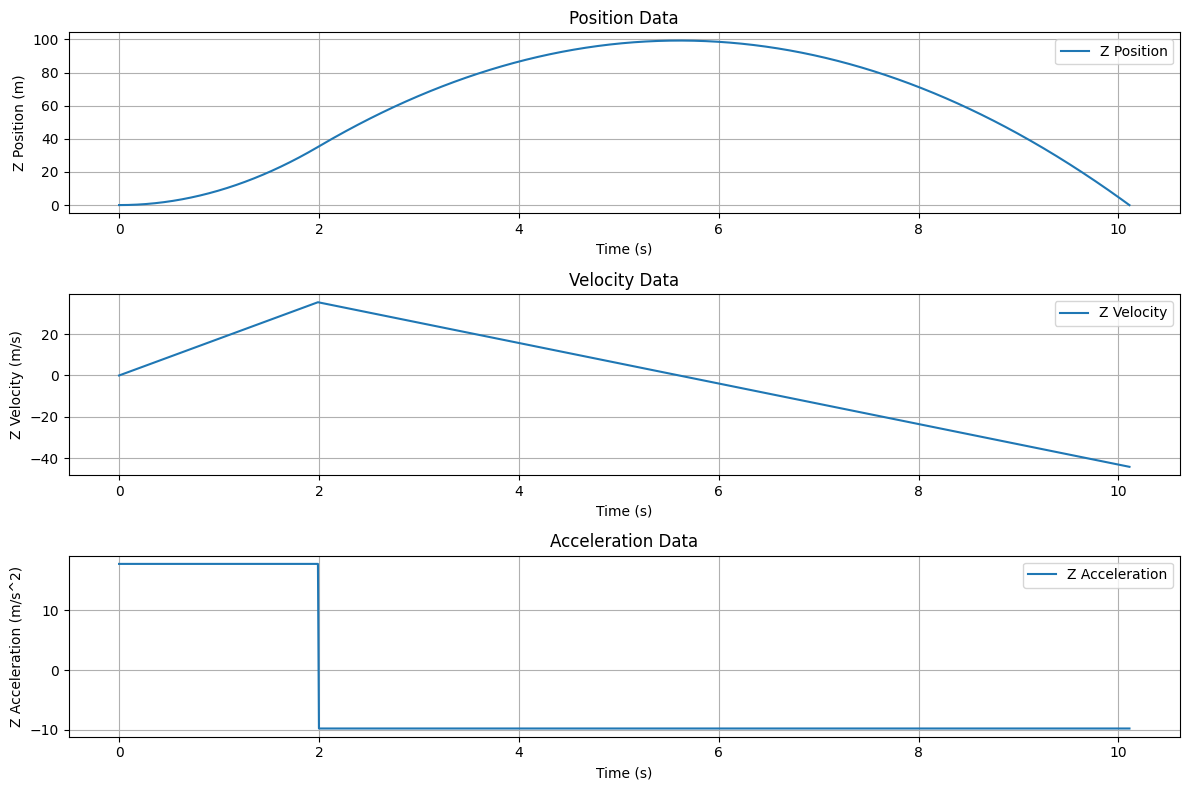

In [51]:
# plot data
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, pos[:, 1], label='Z Position')
plt.xlabel('Time (s)')
plt.ylabel('Z Position (m)')
plt.title('Position Data')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, velocity[:, 1], label='Z Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Z Velocity (m/s)')
plt.title('Velocity Data')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, acceleration[:, 1], label='Z Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Z Acceleration (m/s^2)')
plt.title('Acceleration Data')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

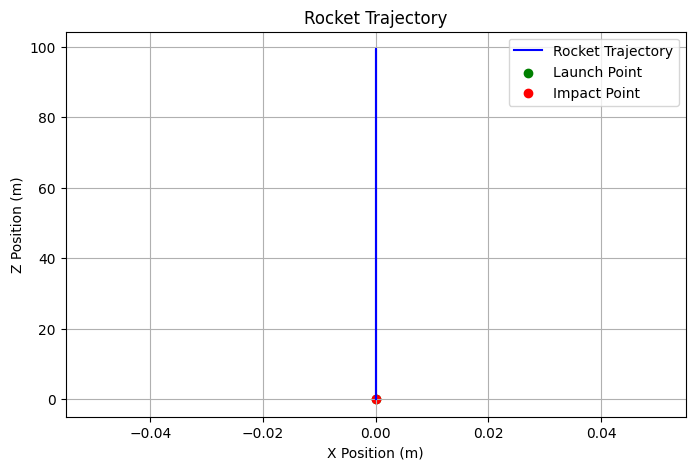

In [48]:
# plot trajectory of rocket (2D)
plt.figure(figsize=(8, 5))

plt.plot(pos[:, 0], pos[:, 1], label='Rocket Trajectory', color='blue')
plt.scatter(pos[0, 0], pos[0, 1], color='green', label='Launch Point')  # mark the launch point
plt.scatter(pos[-1, 0], pos[-1, 1], color='red', label='Impact Point')  # mark the impact point
plt.xlabel('X Position (m)')
plt.ylabel('Z Position (m)')
plt.title('Rocket Trajectory')
plt.legend()
plt.grid()

plt.show()